In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from math import log, sqrt, sin
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
adm_df = pd.read_csv("Admission_Predict_Ver1.1.csv")
adm_df.shape

(500, 9)

In [5]:
adm_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
#Data Cleaning
#Remove Serial No.

adm_df1 = adm_df.drop('Serial No.',axis=1)
adm_df1.shape

(500, 8)

In [7]:
adm_df1.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
adm_df1.groupby('University Rating').mean()

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


In [9]:
#Rename columns to user friendly names

adm_df1.columns = ['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance_of_Admit']

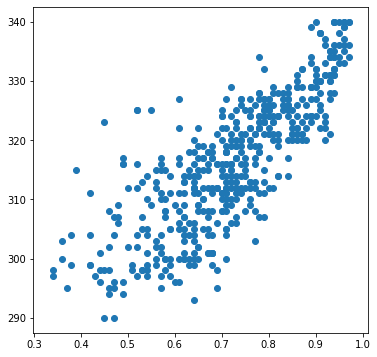

In [10]:

fig = plt.figure(figsize=(6, 6))
ax = fig.gca()
ax.scatter(x=adm_df1.Chance_of_Admit, y =adm_df1.GRE_Score)

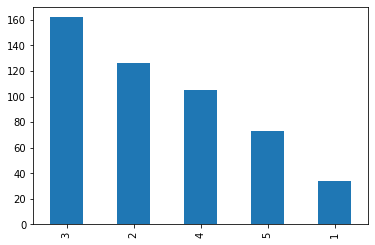

In [11]:
univ_counts=adm_df1['University_Rating'].value_counts()
univ_counts.plot.bar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FB4C4DECC8>,
      dtype=object)

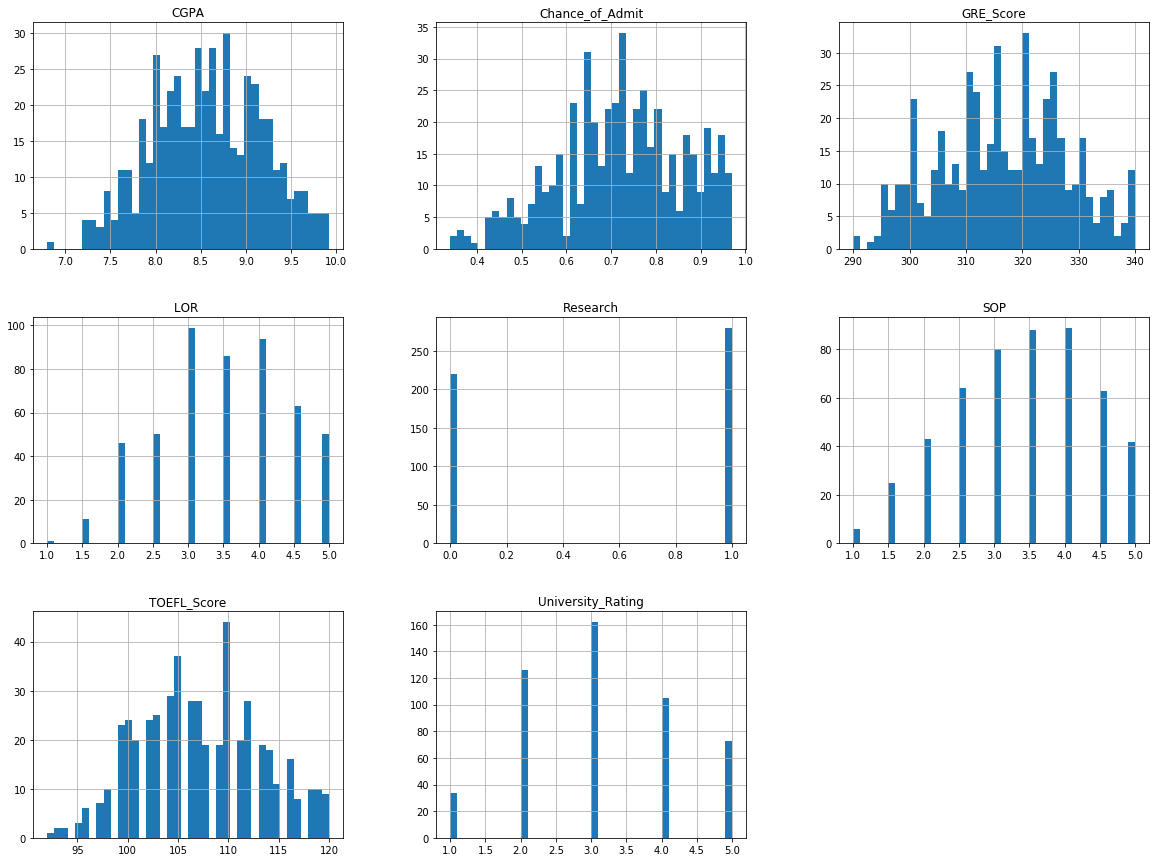

In [12]:
#Only Numeric fields
adm_df1.hist(bins=40,figsize=(20,15))

In [13]:
# Correlation Matrix

adm_df1_corr = adm_df1.corr()
adm_df1_corr

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
GRE_Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL_Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University_Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance_of_Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


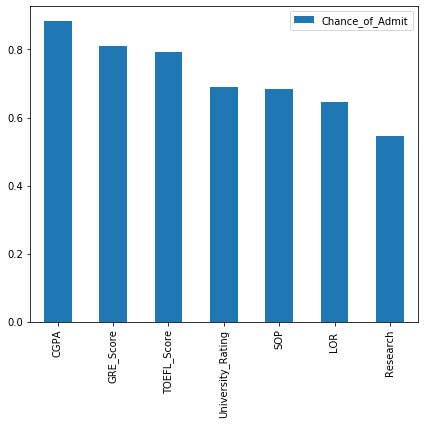

In [14]:
# Correlation bar chart - Descending 

corr_abs = pd.DataFrame(adm_df1_corr['Chance_of_Admit'].abs())
corr_abs.sort_values('Chance_of_Admit', ascending=False)[1:].plot(kind='bar', figsize=(6,6))
plt.tight_layout()

In [15]:
#Split Data - Since Universities with Rating 1 & 5 are few, using stratified splitting
from sklearn.model_selection import train_test_split

adm_final = adm_df1[['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance_of_Admit']]


train, test = train_test_split(adm_final, test_size = 0.2, random_state = 32,stratify=adm_final['University_Rating'])

In [16]:
train_X = train.iloc[:,:-1]
test_X = test.iloc[:,:-1]

print(train_X.shape)
print(train_X.columns)

(400, 7)
Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'],
      dtype='object')


In [17]:
train_Y = train.iloc[:,-1]
test_Y = test.iloc[:,-1]

print(train_Y.shape)


(400,)


In [18]:
# With all the fields
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression().fit(train_X, train_Y)
print(model.score(train_X, train_Y))
print(mean_squared_error(model.predict(train_X),train_Y))


0.8206821667788351
0.003488847101000646


In [19]:
# R like summary

import statsmodels.api as sm


x_train1 = sm.add_constant(train_X)
lm_1 = sm.OLS(train_Y, x_train1).fit()
lm_1.summary()


C:\Users\malagi\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance_of_Admit   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     256.3
Date:                Mon, 15 Jun 2020   Prob (F-statistic):          5.19e-142
Time:                        09:32:38   Log-Likelihood:                 564.06
No. Observations:                 400   AIC:                            -1112.
Df Residuals:                     392   BIC:                            -1080.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2969      0.116    -11.190      0.000      -1.525      -1.069
GRE_Score             0.0021      0.001      3.709      0.000       0.001       0.003
TOEFL_Score           0.0026      0.001      2.609      0.009       0.001       0.005
University_Rating     0.0104      0.004      2.491      0.013       0.002       0.019
SOP                  -0.0001      0.005     -0.021      0.983      -0.010       0.010
LOR                   0.0145      0.005      3.037      0.003       0.005       0.024
CGPA                  0.1149      0.011     10.479      0.000       0.093       0.136
Research              0.0185      0.007      2.476      0.014       0.004       0.033
==============================================================================
Omnibus:                      100.195   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              254.721
Skew:                          -1.217   Prob(JB):                     4.87e-56
Kurtosis:                       6.059   Cond. No.                     1.30e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
# Test set

test_pred = model.predict(test_X)
print(mean_squared_error(test_pred,test_Y))

0.0038433353899177142
